# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee=pd.read_csv('Employee.csv')
employee.head(2)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer here-1st way
employee.groupby('Department').mean().loc[:,['Salary']]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# your answer here-2nd way
pd.pivot_table(
    employee,
    index=['Department'],
    aggfunc={'Salary':'mean'}
)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
pd.pivot_table(
    employee,
    values=['Salary'],
    columns=['Title'],
    index=['Department'],
    aggfunc={'mean'},    
)

Salary                  
             mean                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
pd.pivot_table(
    employee,
    columns=['Years'],
    index=['Title'],
    aggfunc={'Salary':'mean'},    
)

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
# your answer here
pd.pivot_table(
    employee,
    columns=['Department'],
    index=['Title'],
    aggfunc={'Salary':'mean','Department':'count'},
).sort_index(axis=1, ascending=False)

Salary             Department          
Department  Sales    IT    HR      Sales   IT   HR
Title                                             
VP            NaN  70.0  70.0        NaN  1.0  1.0
analyst       NaN  32.5  32.5        NaN  2.0  2.0
associate    55.0  60.0   NaN        2.0  1.0  NaN

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
# your answer here
pd.pivot_table(
    employee,
    values='Salary',
    columns=['Department'],
    index=['Title'],
    aggfunc={'median','min','max','std'},
)[['median','min','max','std']]

median               min               max                   std  \
Department     HR    IT Sales    HR    IT Sales    HR    IT Sales        HR   
Title                                                                         
VP           70.0  70.0   NaN  70.0  70.0   NaN  70.0  70.0   NaN       NaN   
analyst      32.5  32.5   NaN  30.0  30.0   NaN  35.0  35.0   NaN  3.535534   
associate     NaN  60.0  55.0   NaN  60.0  55.0   NaN  60.0  55.0       NaN   

                            
Department        IT Sales  
Title                       
VP               NaN   NaN  
analyst     3.535534   NaN  
associate        NaN   0.0

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here
pd.pivot_table(
    employee,
    values='Salary',
    columns=['Department'],
    index=['Title'],
    aggfunc={'median','min','max','std'},
)[['median','min','max','std']].fillna(0)

median               min               max                   std  \
Department     HR    IT Sales    HR    IT Sales    HR    IT Sales        HR   
Title                                                                         
VP           70.0  70.0   0.0  70.0  70.0   0.0  70.0  70.0   0.0  0.000000   
analyst      32.5  32.5   0.0  30.0  30.0   0.0  35.0  35.0   0.0  3.535534   
associate     0.0  60.0  55.0   0.0  60.0  55.0   0.0  60.0  55.0  0.000000   

                            
Department        IT Sales  
Title                       
VP          0.000000   0.0  
analyst     3.535534   0.0  
associate   0.000000   0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
pd.pivot_table(
    employee,
    index=['Department'],
    aggfunc={'Department':'count','Salary':'sum'},
)

,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
# your answer here
pd.pivot_table(
    employee,
    columns=['Department'],
    index=['Title'],
    aggfunc={'Years':'sum','Salary':'mean'},
)[['Years','Salary']]

Years            Salary            
Department    HR   IT Sales     HR    IT Sales
Title                                         
VP           8.0  8.0   NaN   70.0  70.0   NaN
analyst      6.0  3.0   NaN   32.5  32.5   NaN
associate    NaN  7.0   5.0    NaN  60.0  55.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
def NoMax(x):
    y=0
    for i,j in enumerate(x.sort_values()):
        if i!=(len(x)-1):
            y=y+j
    y=y/(len(x)-1)
    return y

In [13]:
# your answer here
pd.pivot_table(
    employee,
    index=['Department'],
    aggfunc={'Salary':NoMax},
)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
# your answer here
fitbit=pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [15]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [16]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
# your answer here
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [18]:
# your answer here
import matplotlib.pyplot as plt

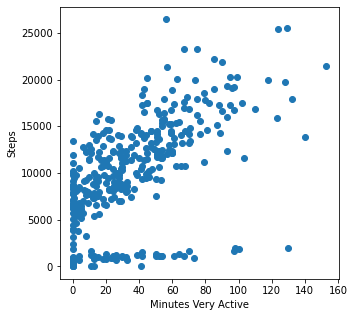

In [19]:
plt.figure(figsize=(5,5))
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.scatter(x=fitbit['Minutes Very Active'],y=fitbit['Steps']);

#### What can you say about Minute Very Active and Steps? Write a comment below

In [20]:
# your comment here
# They do seem to have a positive linear relationship but also have a few outliers that should
# be taken care of

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:
# your answer here
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

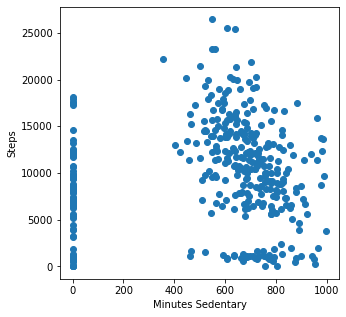

In [22]:
# your answer here
plt.figure(figsize=(5,5))
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.scatter(x=fitbit['Minutes Sedentary'],y=fitbit['Steps']);

In [23]:
# Your comment here
# Minutes Sedentary and steps do not have a linear relationship, the points are too scattered

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
# your answer here
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

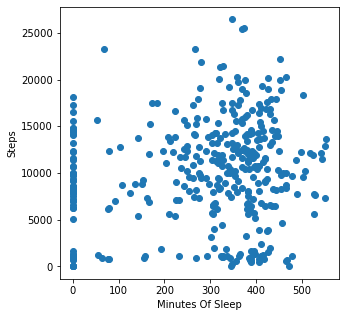

In [25]:
# your answer here
plt.figure(figsize=(5,5))
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.scatter(x=fitbit['MinutesOfSleep'],y=fitbit['Steps']);

In [26]:
# MinutesOfSleep and steps do not have a linear relationship, the points are too scattered

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [27]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit=fitbit[column].corr()

In [28]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [29]:
# your answer here
cor_fit.loc[:,['Steps']].sort_values(by='Steps',ascending=False)

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [30]:
# your answer here
time_grades=pd.read_csv('Time_Grades.csv')

In [31]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

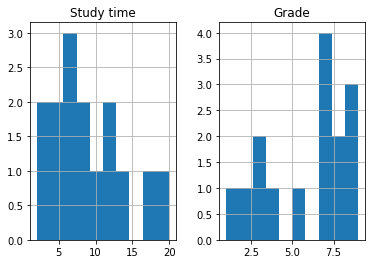

In [32]:
# your answer here
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [33]:
# your answer here-Pearson 
time_grades.corr()
# There is a positive correlation

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [34]:
## your answer here-Spearman
time_grades.corr('spearman')
# There is a positive correlation

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

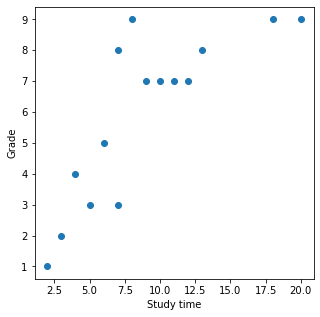

In [35]:
# your answer here
plt.figure(figsize=(5,5))
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.scatter(x=time_grades['Study time'],y=time_grades['Grade']);

In [36]:
#your comment here
# They do have a positive linear relationship but since they are both discrete variables there is
# always certain distance between the possible and limited points

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [37]:
#your comment here
# Spearman correlation has more assumptions, one of them is that variables have a monotonous
# Relationship which makes it so that it evaluates more the direction of the relationship than
# the variations in it, which makes it less sensitive of outliers